In [1]:
import numpy as np
from PIL import Image

**Load the image**

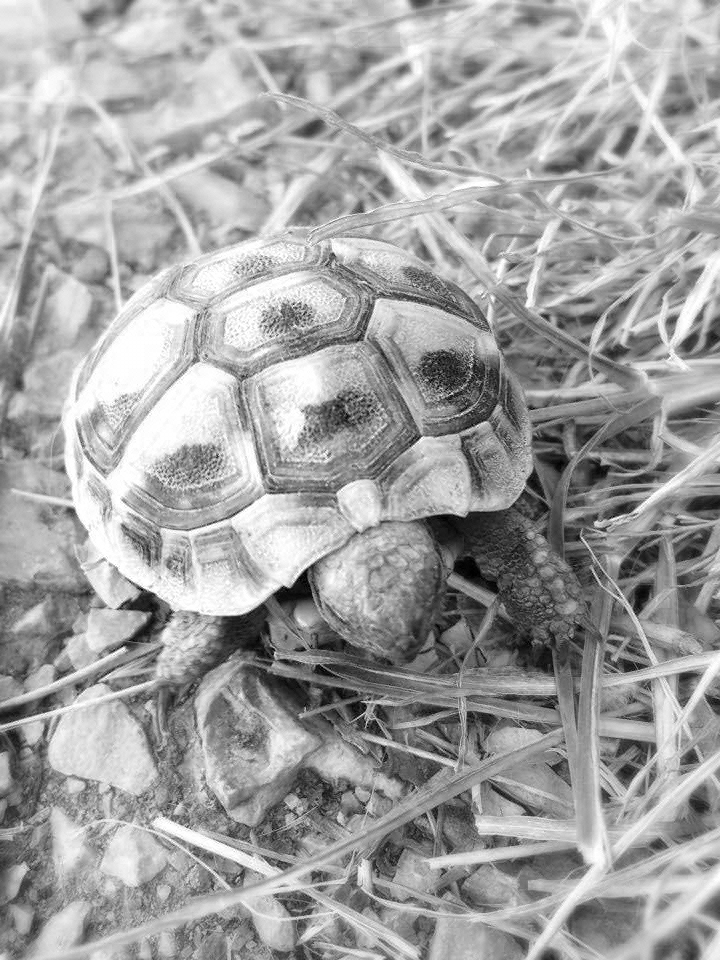

In [3]:
img = Image.open('hidden_message.png')
img_mat = np.array(list(img.getdata()), float)

imgRed = img.getchannel(0)
imgRed

**get form each RGB**

In [4]:
imgGreen = img.getchannel(1)
imgBlue = img.getchannel(2)

**Change to numpy array for manipulation**

In [5]:
imgRed_mat = np.array(imgRed)
print(imgRed_mat.shape)
print('\n', imgRed_mat)

imgGreen_mat = np.array(imgGreen)
print('\n', imgGreen_mat)

imgBlue_mat = np.array(imgBlue)
print('\n', imgBlue_mat)

(960, 720)

 [[248 248 246 ... 159 160 164]
 [246 246 249 ... 166 167 162]
 [244 244 247 ... 166 170 170]
 ...
 [215 217 208 ... 236 235 236]
 [217 214 214 ... 234 233 234]
 [225 218 213 ... 235 233 231]]

 [[252 252 250 ... 181 173 176]
 [252 252 255 ... 170 180 176]
 [253 253 255 ... 173 180 182]
 ...
 [215 217 208 ... 238 236 237]
 [217 214 214 ... 236 234 235]
 [225 218 213 ... 235 233 231]]

 [[253 253 252 ... 137 140 139]
 [252 252 254 ... 136 141 141]
 [252 252 254 ... 142 143 146]
 ...
 [218 213 211 ... 232 231 230]
 [216 216 210 ... 227 228 229]
 [224 220 208 ... 226 224 227]]


**Numpy arrays to store pixel values**

In [7]:
dim_R1,dim_R2 = imgRed_mat.shape
Redmsg = np.empty(shape = (dim_R1//4, dim_R2//4))
print(Redmsg.shape)

dim_G1, dim_G2 = imgGreen_mat.shape
Greenmsg = np.empty(shape = (dim_G1//4, dim_G2//4))
print(Greenmsg.shape)

dim_B1, dim_B2 = imgBlue_mat.shape
Bluemsg = np.empty(shape = (dim_B1//4, dim_B2//4))
print(Bluemsg.shape)

(240, 180)
(240, 180)
(240, 180)


**Normalize image channel arrays**

In [8]:
def norm_hiddenmat(hiddenmat):
    '''
      Min-Max scaling
      Values between [0-1]
    '''

    min_value = hiddenmat.min()
    max_value = hiddenmat.max()
    norm_hidden = (hiddenmat - min_value) / (max_value - min_value)
    return norm_hidden


imgRed_norm = norm_hiddenmat(imgRed_mat)
imgGreen_norm = norm_hiddenmat(imgGreen_mat)
imgBlue_norm = norm_hiddenmat(imgBlue_mat)
print(imgRed_norm)
print(imgGreen_norm)
print(imgBlue_norm)

[[0.97254902 0.97254902 0.96470588 ... 0.62352941 0.62745098 0.64313725]
 [0.96470588 0.96470588 0.97647059 ... 0.65098039 0.65490196 0.63529412]
 [0.95686275 0.95686275 0.96862745 ... 0.65098039 0.66666667 0.66666667]
 ...
 [0.84313725 0.85098039 0.81568627 ... 0.9254902  0.92156863 0.9254902 ]
 [0.85098039 0.83921569 0.83921569 ... 0.91764706 0.91372549 0.91764706]
 [0.88235294 0.85490196 0.83529412 ... 0.92156863 0.91372549 0.90588235]]
[[0.98823529 0.98823529 0.98039216 ... 0.70980392 0.67843137 0.69019608]
 [0.98823529 0.98823529 1.         ... 0.66666667 0.70588235 0.69019608]
 [0.99215686 0.99215686 1.         ... 0.67843137 0.70588235 0.71372549]
 ...
 [0.84313725 0.85098039 0.81568627 ... 0.93333333 0.9254902  0.92941176]
 [0.85098039 0.83921569 0.83921569 ... 0.9254902  0.91764706 0.92156863]
 [0.88235294 0.85490196 0.83529412 ... 0.92156863 0.91372549 0.90588235]]
[[0.99215686 0.99215686 0.98823529 ... 0.5372549  0.54901961 0.54509804]
 [0.98823529 0.98823529 0.99607843 ... 

**Compute singular values for each non-overlapping 4 * 4 block in the image**

In [9]:
def find(x, y, T):

    n_rows, n_cols = y.shape
    for i in range(n_rows):
        for j in range(n_cols):
            block = x[4 * i: 4 * (i + 1), 4 * j: 4 * (j + 1)]
            U, sigma, V = np.linalg.svd(block)
            sig_1, sig_2, sig_3, sig_4 = sigma
            yval = 0
            if sig_2 - sig_3 > T:
                yval = 1
            y[i][j] = yval
    return y


T = 0.004

In [10]:
Redmsg = find(imgRed_norm, Redmsg, T)
Greenmsg = find(imgGreen_norm, Greenmsg, T)
Bluemsg = find(imgBlue_norm, Bluemsg, T)

**Superimpose the three message channels**

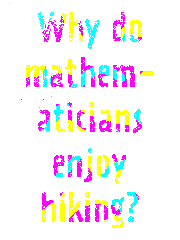

In [13]:
# To create an RGB image from the three message channels

msg =(np.dstack((Redmsg, Greenmsg, Bluemsg)) * 255) .astype(np.uint8)
Final_msg = Image.fromarray(msg)
Final_msg

Cuz its all about the steps..!!